In [38]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import ClassifierChain
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import randint
from scipy.ndimage import shift

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)

In [3]:
X, y = mnist.data, mnist.target
print(X.shape)
y.shape

(70000, 784)


(70000,)

In [4]:
def plot_digit(image_data):
  image = image_data.reshape(28, 28) 
  plt.imshow(image, cmap="binary") 
  plt.axis("off")

5


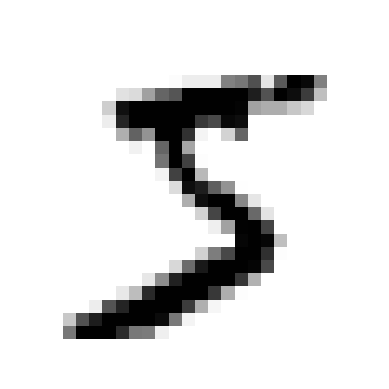

In [5]:
plot_digit(X[0])
print (y[0])

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

y_train_5 = (y_train == '5') 
y_test_5 = (y_test == '5')

In [7]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [8]:
print(sgd_clf.predict([X_test[0]]))
print(y_test[0])

[False]
7


In [9]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [10]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5) 
print(any(dummy_clf.predict(X_train)))

False


In [11]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [12]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)


In [13]:
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [14]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [15]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [16]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [17]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")


In [18]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

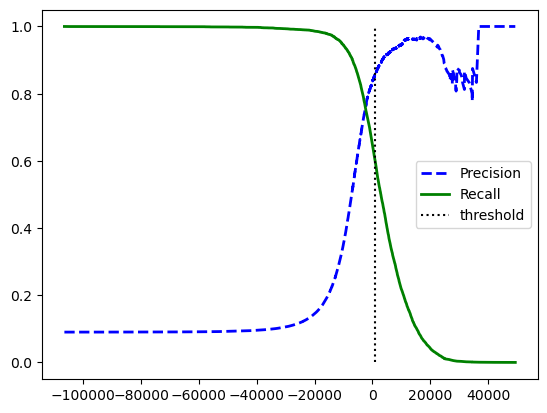

In [19]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2) 
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2) 
plt.vlines(1000, 0, 1.0, "k", "dotted", label="threshold")
plt.legend()

In [20]:
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

['5']
5


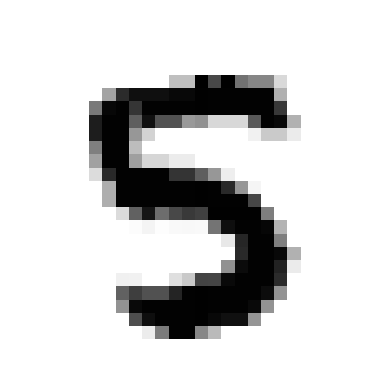

In [21]:
some_digit = 120
print(svm_clf.predict([X_test[some_digit]]))
print (y_test[some_digit])
plot_digit(X_test[some_digit])

In [22]:
cross_val_score(sgd_clf, X_train, y_train, scoring="accuracy")

KeyboardInterrupt: 

In [23]:
X_train_scaled = X_train / 255

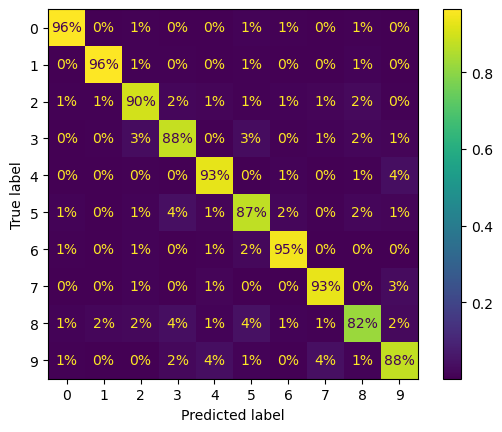

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3) 
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%") 
plt.show()


In [ ]:
y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1) 
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier() 
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

/Users/zeinebtekaya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/zeinebtekaya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

In [ ]:
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

In [ ]:
chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [ ]:
X_test_2d= X_test[some_digit].reshape(-1, X_test[some_digit].shape[-1])
chain_clf.predict(X_test_2d)

array([[0., 1.]])

In [ ]:
print(y_test[some_digit])

5


In [24]:
knn_reg = KNeighborsClassifier()
knn_reg.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [27]:
knn_rmses = -cross_val_score(knn_reg, X_train, y_train,
                              scoring="neg_root_mean_squared_error", cv=10) 
pd.Series(knn_rmses).describe()

/Users/zeinebtekaya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/zeinebtekaya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

count    10.000000
mean      0.729681
std       0.058686
min       0.637574
25%       0.689781
50%       0.736827
75%       0.750854
max       0.852936
dtype: float64

In [34]:
param_distribs = {'n_neighbors': randint(1, 10),
                  'weights': ['uniform', 'distance'],
                  }
knn_search = RandomizedSearchCV(knn_reg, param_distributions=param_distribs, cv=5, scoring='neg_root_mean_squared_error', random_state=42)
knn_search.fit(X_train[:10_000], y_train[:10_000])

/Users/zeinebtekaya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/zeinebtekaya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f9c13058a30>,
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [35]:
knn_search.best_score_

-0.9933350783898793

In [36]:
model = knn_search.best_estimator_
model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=4, weights='distance')

In [37]:
model.score(X_test, y_test)

0.9714

In [39]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

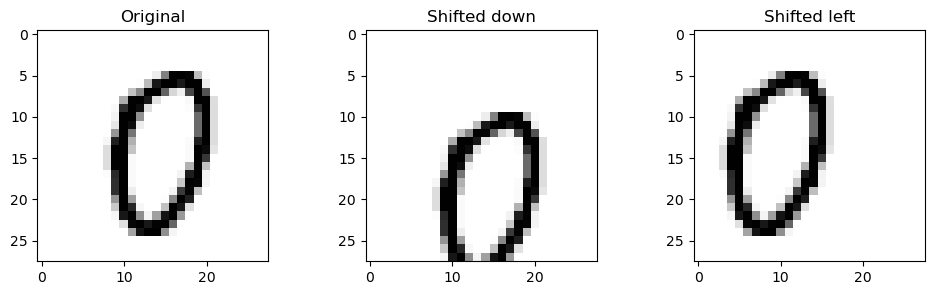

In [40]:
image = X_train[1000]  # some random digit to demo
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.title("Original")
plt.imshow(image.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down")
plt.imshow(shifted_image_down.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left")
plt.imshow(shifted_image_left.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.show()

In [41]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((-1, 0), (1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [42]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [46]:
knn_clf = KNeighborsClassifier(**knn_search.best_params_)
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [47]:
augmented_accuracy = knn_clf.score(X_test, y_test)
augmented_accuracy

0.9763